## Import

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Gdrive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회'

In [ ]:
os.listdir()

['open.zip의 사본',
 'open',
 'submit.csv',
 'sequence_api.png',
 'func_api.png',
 '2022 07 20',
 '[Baseline]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[비지도학습] creditcard_fraud.ipynb',
 'Histograms.png',
 '[EDA]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[rodustScale]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[rodustScale&PCA]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[rodustScale&standard]_Anomaly Detection with IsolationForest (비지도학습).ipynb']

## Data Load

In [ ]:
train_df = pd.read_csv('./open/train.csv') # Train
print(train_df.shape)
print(type(train_df))
train_df.tail()

(113842, 31)
<class 'pandas.core.frame.DataFrame'>


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939
113841,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,1.034951


In [ ]:
val_df = pd.read_csv('./open/val.csv') # Validation
print(val_df.shape)
val_df.tail()

(28462, 32)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,0.534689,0.748099,-0.338301,1.018502,-1.058923,-0.914161,0.143397,0.154285,1.000673,0.007075,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,0.874312,0.162691,-1.011819,-0.317789,-0.887823,0.482847,0.681412,0.486991,-0.022064,0.024870,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0
28461,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,1.034975,0


In [ ]:
# null값 없음
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())

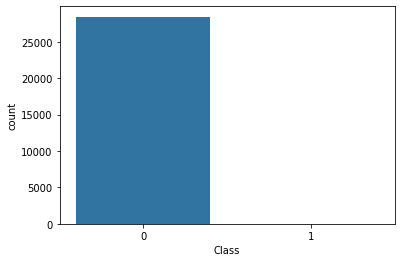

In [ ]:
# Target Class 분포
sns.countplot(x='Class', data=val_df);

In [ ]:
val_df['Class'].value_counts(normalize=True)

0    0.998946
1    0.001054
Name: Class, dtype: float64

In [ ]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [ ]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,0.004007,0.002480,0.004170,0.012299,0.003177,0.004913,0.007552,0.005733,0.000146,0.001928,0.000013,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,1.016507,0.990731,1.000558,0.938752,0.913747,0.864289,0.821528,0.833280,0.808897,0.729583,0.700859,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,-4.453853,-16.060306,-3.848943,-14.952981,-4.391307,-12.675269,-20.740664,-8.153668,-4.197145,-18.292308,-14.004410,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,-0.755867,-0.408285,-0.638741,-0.411374,-0.572378,-0.461673,-0.474047,-0.491693,-0.463059,-0.212876,-0.226196,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,-0.033527,0.137370,-0.012317,0.059680,0.053606,0.070931,-0.066174,0.000890,0.000397,-0.062481,-0.029430,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,0.743699,0.618721,0.666392,0.500190,0.648310,0.521601,0.399337,0.509625,0.462772,0.131592,0.186905,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,10.853012,4.202685,4.465413,7.692209,3.845738,4.462229,6.983545,3.505916,5.591971,24.133894,22.599543,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


# Scaling

## V29, V30 feature의 평균이 다른 feature와 값이 큼
-> 스케일링 필요

In [ ]:
sdS_train_df = train_df.copy()
rbS_train_df = train_df.copy()
rbS02_train_df = train_df.copy()


In [ ]:
# # feature scaling (StandardScaler)
# from sklearn.preprocessing import StandardScaler

# sd_scaler = StandardScaler()
# sdS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

# sdS_train_df.describe()

In [ ]:
# # feature scaling (RobustScaler01)
# from sklearn.preprocessing import RobustScaler

# sd_scaler = RobustScaler()
# rbS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

# rbS_train_df.describe()

In [ ]:
# # feature scaling (RobustScaler02)
# from sklearn.preprocessing import RobustScaler

# sd_scaler = RobustScaler()
# rbS02_train_df.iloc[:, -2:] = sd_scaler.fit_transform(train_df.iloc[:, -2:])

# rbS02_train_df.describe()

In [ ]:


train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


## Train/Validation Feature 분포 확인

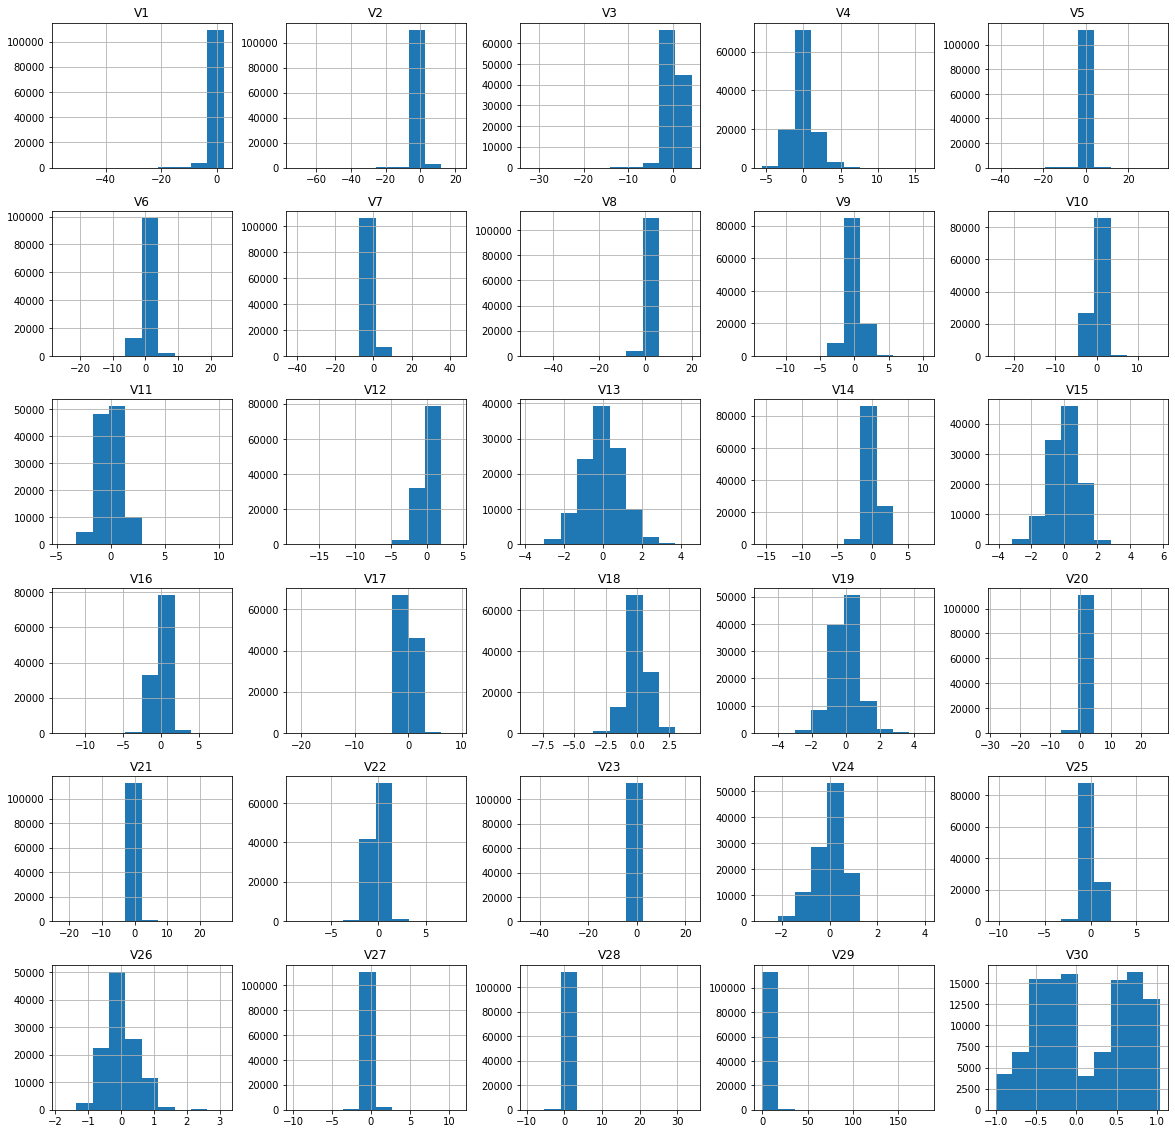

In [ ]:
rbS_train_df.drop(columns=['ID']).hist(figsize = (20,20))
plt.show()

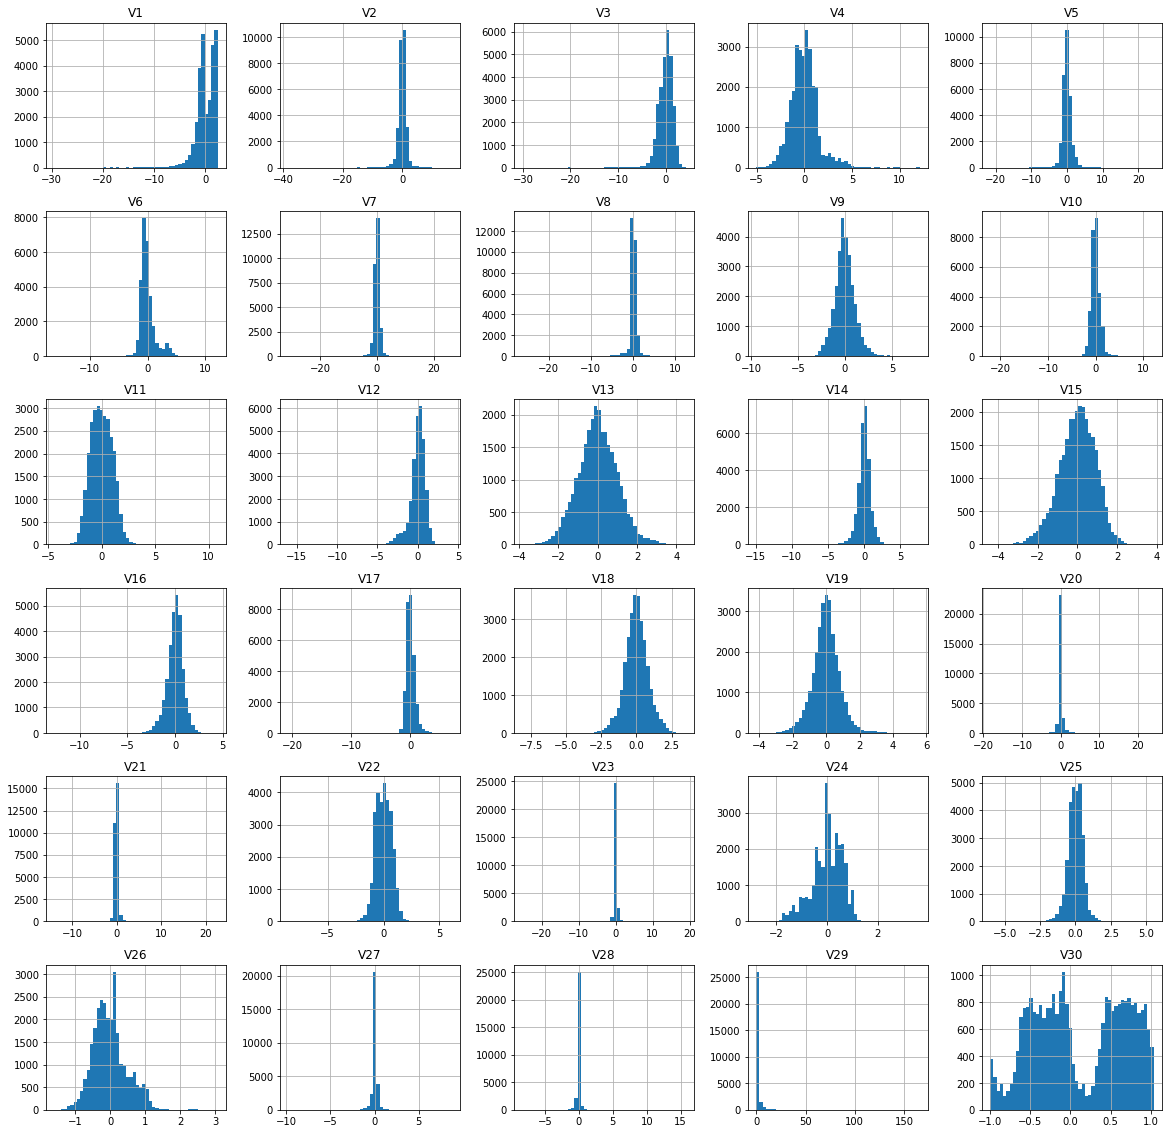

In [ ]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

In [ ]:
# val_y = val_df[['Class']]
# val_y_f = val_df[(val_df['Class']==1)]
# val_y_f.hist(bins = 50, figsize = (20,20))
# plt.show()

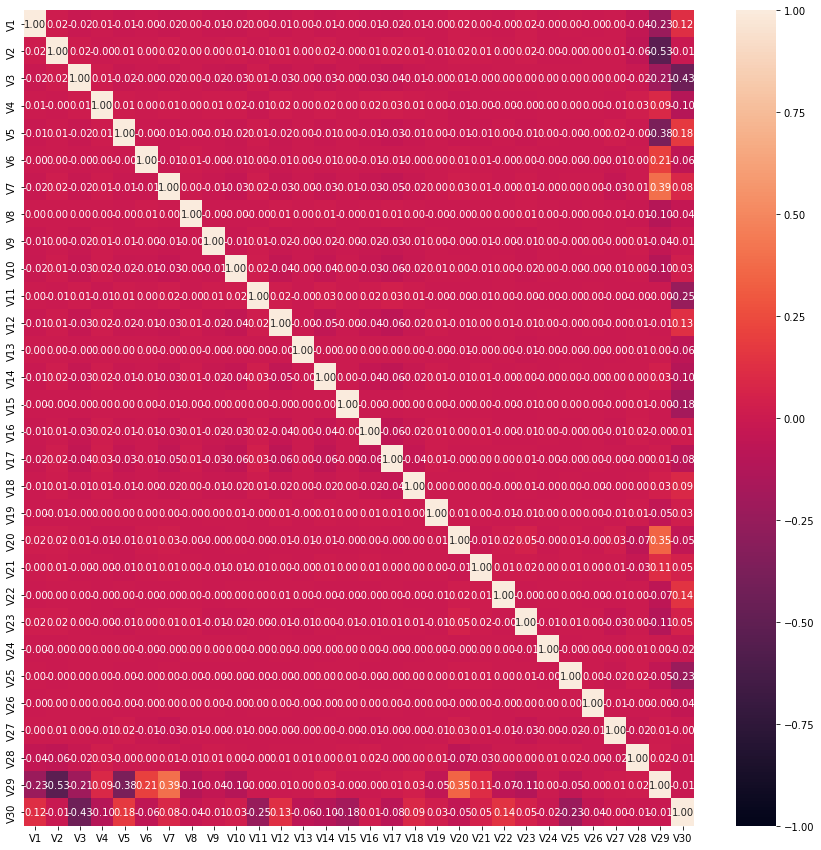

In [ ]:
# 상관관계
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(
    train_df.drop('ID', axis=1).corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    # cmap="BrBG",
    fmt='.2f',
    # cbar=False
    )
plt.show()

# 주성분분석

## PCA

In [ ]:
pca = PCA(n_components=3, random_state=20)
pca.fit(val_df)
val_df_pca = pca.transform(val_df)

val_df_pca = pd.DataFrame(data=val_df_pca, index=val_df.index)
val_df_pca.head()

,0,1,2
0,142539.840143,-1.520904,0.345010
1,142527.840141,-0.992738,-1.169872
2,142486.840137,-1.040886,-1.327657
3,142480.840145,-0.717153,-1.289349
4,142466.840149,-1.595636,3.211737


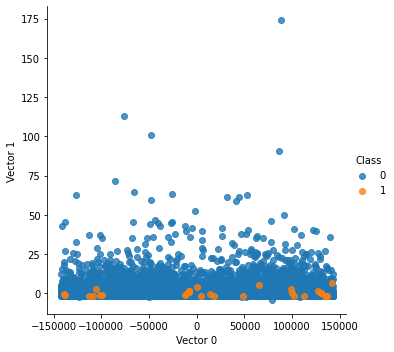

In [ ]:
# 2개의 주성분으로 클래스 구분한 결과를 시각화
def plot_scatter(dfx, dfy, col1=0, col2=1):
    temp = pd.DataFrame(data=dfx.loc[:,[col1, col2]], index=dfx.index)
    temp = pd.concat((temp,dfy), axis=1, join="inner")
    temp.columns = [f"Vector {col1}", f"Vector {col2}", "Class"]
    sns.lmplot(x=f"Vector {col1}", y=f"Vector {col2}", hue="Class", 
               data=temp, fit_reg=False)
    
plot_scatter(val_df_pca, val_df['Class'], 0, 1)

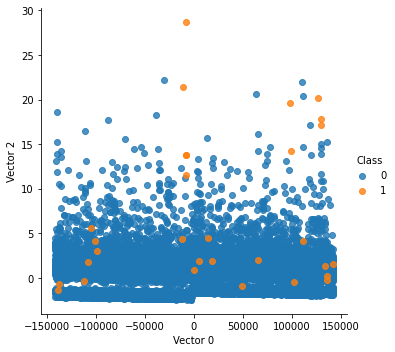

In [ ]:
plot_scatter(val_df_pca, val_df['Class'], 0, 2)

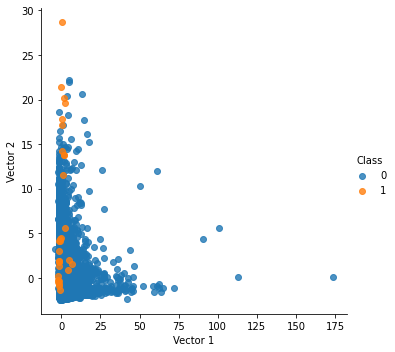

In [ ]:
plot_scatter(val_df_pca, val_df['Class'], 1, 2)

# Z-Test


In [ ]:
valid_normal = val_df[val_df['Class']==0].drop('ID', axis=1)
valid_normal.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,0.534689,0.748099,-0.338301,1.018502,-1.058923,-0.914161,0.143397,0.154285,1.000673,0.007075,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,0.874312,0.162691,-1.011819,-0.317789,-0.887823,0.482847,0.681412,0.486991,-0.022064,0.024870,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0
28461,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,1.034975,0


In [ ]:
valid_fraud = val_df[val_df['Class']==1].drop('ID', axis=1)
valid_fraud.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
24742,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,-2.120458,1.863596,-3.620252,-1.480714,-1.583343,-1.230469,-1.202298,-6.167637,-2.651539,0.013588,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,3.156012,0.810172,1
25042,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,-5.258096,5.716319,-5.810407,0.723293,-12.289133,0.378773,-2.020734,-2.039703,0.658183,0.832574,0.804101,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.296653,0.826631,1
25504,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,-3.064730,3.480602,-3.735153,-0.594778,-8.229952,-1.476094,-0.408471,-1.481283,0.347627,-1.164414,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,-0.237965,0.851925,1
27998,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,0.994549,1
28146,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,0.286872,1.006309,1


In [ ]:
cols = list(val_df.drop(['ID', 'Class'], axis=1).columns)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30']

## Z-score

In [ ]:
len(train_df)

113842

In [ ]:
len(valid_fraud)

30

In [ ]:
np.sqrt(len(valid_fraud))

5.477225575051661

In [ ]:
# def ztest(feature):
#   mean = valid_normal[feature].mean()
#   std = valid_fraud[feature].std() # 해당 칼럼에 대해 표준편차를 구함.
#   zScore = (valid_fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))  # 이상치가 존재하는 val 데이터의 평균 - 이상치가 존재하지 않는 val 데이터의 평균 빼고 (이상치가 존재하는 분산 나누기)
#   return zScore

# sample_size = len(valid_fraud)
# significant_features = []
# remainder_features = []
# critical_value = 2.58

# for i in cols:
#   z_value = ztest(i)

#   if (abs(z_value) >= critical_value):
#     significant_features.append(i)
#   else:
#     remainder_features.append(i)


# print('significant_features:', significant_features)
# len(significant_features)
# print('remainder_features: ', remainder_features)
# len(remainder_features)

## Modified Z-score

In [ ]:
from scipy import stats

In [ ]:
def ZRscore_outlier(df):
  out=[]
  med = np.median(df)
  ma = stats.median_absolute_deviation(df)

  for i in df: 
      z = (0.6745*(i-med))/ (np.median(ma))
      if np.abs(z) > 3: 
          out.append(i)
  # print(out)
  return len(out)


In [ ]:
# len(cols)

In [ ]:
# sig = []
# unsig = []
# if ZRscore_outlier(train_df['V1']) >= (len(train_df['V1']) * 0.2):
#   sig.append('V1')
# else:
#   unsig.append('V1')

# print(ZRscore_outlier(train_df['V5']))       

In [ ]:
# print(sig)
# print(unsig)

# zscore 찐

In [ ]:
len(val_df)* 0.0015

42.693

In [ ]:
sig = []
unsig = []
for i in range(len(cols)):
  if ZRscore_outlier(val_df[cols[i]]) >= (len(val_df) * 0.0015):
    sig.append(cols[i])
  else:
    unsig.append(cols[i])
                     
print(sig)
print(unsig)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V19', 'V20', 'V21', 'V23', 'V25', 'V26', 'V27', 'V28', 'V29']
['V11', 'V13', 'V15', 'V18', 'V22', 'V24', 'V30']


In [ ]:
ztest_11=ZRscore_outlier(train_df['V11'])
ztest_13=ZRscore_outlier(train_df['V13'])
ztest_15=ZRscore_outlier(train_df['V15'])
ztest_22=ZRscore_outlier(train_df['V22'])
ztest_24=ZRscore_outlier(train_df['V24'])
ztest_30=ZRscore_outlier(train_df['V30'])

print('11: ', ztest_11)
print('13: ', ztest_13)
print('15: ', ztest_15)
print('22: ', ztest_22)
print('24: ', ztest_24)
print('30: ', ztest_30)

11:  44
13:  2
15:  14
22:  95
24:  59
30:  0


# unsig feature PCA

In [ ]:
train_sig_df = train_df[sig]
val_sig_df = val_df[sig]

In [ ]:
train_unsig_df = train_df[unsig]
val_unsig_df = val_df[unsig]

In [ ]:
train_unsig_df

,V11,V13,V15,V18,V22,V24,V30
0,0.624501,0.717293,2.345865,-0.121359,0.771679,-0.689281,-0.994972
1,-0.226487,0.507757,-0.631418,1.965775,0.005274,-1.175575,-0.994972
2,1.341262,-0.358091,0.517617,0.068653,-0.559825,-0.371427,-0.994960
3,-0.619468,1.757964,0.686133,-0.358222,-1.015455,-0.649709,-0.994901
4,-0.705117,-0.286254,-0.328783,0.118765,-0.268092,1.011592,-0.994901
...,...,...,...,...,...,...,...
113837,-1.052365,1.088141,-0.931503,-0.085524,-1.565026,-1.253276,1.034857
113838,-1.134176,0.345928,-0.679626,-0.420551,0.634646,-0.053206,1.034881
113839,-0.612982,-0.732987,-0.293959,-0.891169,-0.514376,0.371441,1.034904
113840,0.644837,-0.546329,-0.808036,0.373110,-0.808520,0.102800,1.034939


In [ ]:
# feature scaling (RobustScaler01)
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
train_sig_df.loc[:, :] = rb_scaler.fit_transform(train_sig_df)
val_sig_df.loc[:, :] = rb_scaler.fit_transform(val_sig_df)



In [ ]:
# feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
train_unsig_df.loc[:, :] = sd_scaler.fit_transform(train_unsig_df)

val_unsig_df.loc[:, :] = sd_scaler.fit_transform(val_unsig_df)


In [ ]:
# pca = PCA(n_components=3, random_state=20)
# pca.fit(train_unsig_df)
# train_unsig_df_pca = pca.transform(train_unsig_df)

# train_unsig_df_pca = pd.DataFrame(data=train_unsig_df_pca, index=train_unsig_df.index)
# train_unsig_df_pca

In [ ]:
# pca = PCA(n_components=3, random_state=20)
# pca.fit(val_unsig_df)
# val_unsig_df_pca = pca.transform(val_unsig_df)

# val_unsig_df_pca = pd.DataFrame(data=val_unsig_df_pca, index=val_unsig_df.index)
# val_unsig_df_pca

In [ ]:
# pca.explained_variance_

In [ ]:
train_df_final = pd.concat([train_sig_df,train_unsig_df], axis=1)
train_df_final

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V14,V16,V17,V19,V20,V21,V23,V25,V26,V27,V28,V29,V11,V13,V15,V18,V22,V24,V30
0,-0.612112,-1.006630,0.827352,0.250097,-0.344414,1.769653,0.671316,0.421547,-1.181165,0.301844,-0.073708,-0.237564,-2.978277,1.331896,-2.467983,1.702410,0.669406,2.976456,-0.516715,-0.152172,-0.350682,-0.540885,4.988951,0.617126,0.718913,2.562481,-0.147424,1.066111,-1.136246,-1.990839
1,-0.436985,-0.180075,0.837651,-0.528801,0.033549,1.297307,0.177167,0.662829,-1.078087,0.036265,0.035992,-0.370427,-1.134369,-0.698427,-1.347260,-0.420331,-0.187676,-0.575026,0.939710,-0.298261,0.377613,0.383672,1.420280,-0.221548,0.508304,-0.689029,2.364897,0.007285,-1.938909,-1.990839
2,-0.195654,0.639905,0.498305,-0.093295,0.364281,0.207199,0.390040,0.445048,-0.417156,-0.283786,0.213698,-0.206181,0.337759,0.009966,-0.041215,0.428182,-0.428115,-0.045653,-0.375037,0.279949,1.556456,0.533349,-0.255664,1.323514,-0.361979,0.565839,0.081298,-0.773425,-0.611606,-1.990818
3,-0.293161,0.967282,0.463568,-0.296277,0.769128,0.598059,0.965002,-7.119504,0.539122,1.355415,0.146770,-1.498806,-0.143610,-1.307315,0.348279,-0.271784,4.747881,0.225298,-0.647604,0.002083,-7.453594,-8.363822,0.263636,-0.608841,1.764915,0.749876,-0.432539,-1.402900,-1.070930,-1.990712
4,-0.404832,0.157281,-0.154638,-0.158005,2.088588,3.409873,0.295416,1.543552,-0.274508,-0.323253,-0.246395,0.024179,-0.278546,-0.489828,0.615953,0.334841,-0.103783,-0.619954,0.530169,-0.584380,0.063194,1.001114,0.996503,-0.693250,-0.289774,-0.358520,0.141618,-0.370382,1.671161,-1.990712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-5.596084,7.243616,-4.508356,-1.560911,-3.475750,-0.957870,-3.275770,10.185317,3.993958,8.845516,2.634715,1.346556,1.008801,0.739127,-0.627486,10.288983,-2.199790,2.915945,2.641591,0.658872,12.886318,9.318885,-0.168951,-1.035473,1.091661,-1.016754,-0.104288,-2.162159,-2.067159,1.645815
113838,0.836489,-0.150241,-0.616248,0.956261,0.014386,-0.291282,0.134905,-0.502102,0.580379,0.214123,0.524604,-0.054612,-0.620953,-0.150528,-0.313529,-0.263833,0.419257,-0.096408,0.445322,-0.720683,0.103394,-0.398372,0.532168,-1.116101,0.345647,-0.741677,-0.507566,0.876793,-0.086360,1.645857
113839,-0.113449,0.462221,0.112409,-0.278235,0.228969,-0.914505,0.794357,-0.422428,0.127922,-0.196101,-0.203552,0.202370,-0.314226,-0.122118,-0.321383,-0.221887,-0.477722,0.942531,-0.862660,0.292699,0.801877,0.534758,-0.230210,-0.602449,-0.738795,-0.320488,-1.074057,-0.710635,0.614549,1.645899
113840,0.048347,0.618780,-0.379949,-0.454741,0.908215,0.031128,0.690285,0.175017,-0.122685,-0.573051,0.048404,-0.853809,0.537118,0.155471,0.135291,0.184081,-0.682982,0.202172,-0.678380,0.311984,1.334997,0.439703,-0.269371,0.637167,-0.551181,-0.881914,0.447778,-1.117010,0.171137,1.645962


In [ ]:
val_df_final = pd.concat([val_sig_df, val_unsig_df], axis=1)
val_df_final

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V14,V16,V17,V19,V20,V21,V23,V25,V26,V27,V28,V29,V11,V13,V15,V18,V22,V24,V30
0,-0.162183,0.744996,0.460888,-0.126025,0.425798,0.029493,0.543793,0.087732,-0.540813,-0.269284,0.680639,-0.552021,0.679893,-0.543639,0.487536,0.772764,-0.526466,-0.356990,-0.128020,0.252386,1.527353,0.532632,-0.260226,0.997165,1.002131,0.160924,0.565180,-0.880277,-0.640623,-1.996993
1,0.420827,0.180512,-0.184265,1.338888,0.911796,1.715678,0.055189,0.932874,-0.907689,0.829401,0.262320,1.013709,-0.684613,0.536601,-2.190473,-0.600462,0.419819,-0.121157,0.554243,0.438040,0.098722,-0.200798,0.162502,1.658968,-0.940083,0.774553,-2.091645,0.556282,-2.276673,-1.996825
2,0.502862,0.356470,0.009671,1.646140,-0.030407,-0.662816,0.435991,-0.494616,-0.669588,0.863186,-0.777243,0.799927,0.228291,-0.253845,-1.092901,-0.373240,0.098127,-0.212511,0.914479,0.172593,-0.333646,0.030888,0.163058,-0.445596,-1.311983,0.347057,-0.548668,-0.167643,1.143898,-1.996320
3,0.404945,-0.284802,0.112386,0.355701,0.231019,1.676032,-0.425702,1.108403,0.236388,-0.126969,1.214979,0.279176,-1.428540,1.224024,-1.137831,-0.356810,-0.026828,0.352363,0.101346,0.749585,0.221328,-0.135888,0.324031,1.909059,-0.483171,0.230910,-2.550264,0.108320,-1.647833,-1.996257
4,-1.357545,1.801384,0.694003,-1.506046,0.276934,-0.472000,1.813960,-3.463062,3.289473,6.192857,-0.068664,-3.177854,-0.381078,-2.148115,-1.009268,7.313320,-1.991955,-0.497122,0.177229,0.894588,-1.564736,-8.393583,-0.291086,2.526828,-0.357551,0.316340,-0.529462,-0.252992,0.852936,-1.996088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.255463,0.969323,-0.259493,0.595458,0.443556,-0.247293,0.916163,0.462206,-0.833548,0.021780,0.594669,1.051843,-1.001848,0.239952,1.080409,0.201924,0.623550,-0.535310,0.002514,-0.608070,1.871916,1.212218,0.196142,0.522073,-0.342286,-1.162377,0.178278,1.077988,0.048148,1.638566
28458,-0.353238,0.365967,-0.574865,-0.249595,0.735939,-0.416652,0.639885,0.733157,-0.536074,-1.153515,0.024655,-0.414089,0.418923,0.855965,-0.024260,0.253581,0.079787,0.499591,-0.322478,0.556304,-0.953702,-0.581320,0.800695,0.856188,-1.015440,-0.975123,0.577558,-0.600413,0.971142,1.638692
28459,-0.210899,0.875297,-0.182728,0.630351,0.487180,-0.281985,1.084480,-1.991915,-0.282868,0.177191,-0.806458,0.761103,-1.221260,0.441098,0.803623,-0.408819,2.133206,-0.446052,-0.009593,-0.549570,3.123951,1.635211,0.529626,-1.274224,-1.485091,-0.212665,-0.249134,0.421500,-0.066428,1.638819
28460,0.903577,-0.178880,-0.728335,0.160981,0.033983,-0.386942,-0.026260,-0.263380,0.405163,0.369663,0.410589,0.621494,0.157057,-0.617229,0.606264,-0.564469,-0.577627,1.009101,-0.492266,0.440060,-0.505406,-0.654797,-0.274127,0.510885,-0.838377,-0.596095,-0.202554,-0.995976,-0.598710,1.639113


In [96]:
train_df_final= train_df_final.drop(columns=['V30'])

In [98]:
val_df_final = val_df_final.drop(columns=['V30'])

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [99]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# train_df = train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# rbS_train_df = rbS_train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# rbS02_train_df = rbS02_train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# train_df = train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_originDF = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_originDF.fit(train_df)

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model.fit(rbS_train_df)

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_rbS02 = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_rbS02.fit(rbS02_train_df)

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_0727 = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_0727.fit(train_sig)

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_0802 = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_0802.fit(train_df_final)

In [100]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model_0803 = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
model_0803.fit(train_df_final)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

## Evaluation : Validation set

In [101]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [91]:
# val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
# val_y = val_df['Class'] # Label

# val_pred = model.predict(val_x) # model prediction
# val_pred = get_pred_label(val_pred)
# val_score = f1_score(val_y, val_pred, average='macro')
# print(f'Validation F1 Score : [{val_score}]')
# print(classification_report(val_y, val_pred))

In [102]:
# val_x_data = val_sig.drop(columns=['Class']) # Input Data
val_x_data = val_df_final
val_y_data = val_df['Class']


In [103]:
val_x_data = val_df_final
val_y_data = val_df['Class']

val_pred = model_0803.predict(val_x_data) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_data, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_data, val_pred))

Validation F1 Score : [0.8927516353661109]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.73      0.79        30

    accuracy                           1.00     28462
   macro avg       0.92      0.87      0.89     28462
weighted avg       1.00      1.00      1.00     28462



## Inference : Test set

In [ ]:
test_df = pd.read_csv('./open/test.csv') # Train
test_df.tail()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
142498,0x4587f,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0.028645,1.034904
142499,0x45880,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0.810312,1.034916
142500,0x45884,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,1.034963
142501,0x45885,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,1.034975
142502,0x45887,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,1.035022


In [ ]:
test_sig_df = test_df[sig]
test_unsig_df = test_df[unsig]

In [ ]:
# feature scaling (RobustScaler01)
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
test_sig_df.loc[:, :] = rb_scaler.fit_transform(test_sig_df)



In [ ]:
# feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
test_unsig_df.loc[:, :] = sd_scaler.fit_transform(test_unsig_df)



In [84]:
# pca = PCA(n_components=3, random_state=20)
# pca.fit(test_unsig_df)
# test_unsig_df_pca = pca.transform(test_unsig_df)

# test_unsig_df_pca = pd.DataFrame(data=test_unsig_df_pca, index=test_unsig_df.index)
# test_unsig_df_pca

test_df_final = pd.concat([test_sig_df, test_unsig_df], axis=1)
test_df_final = test_df_final.drop(columns=['V30'])

In [ ]:
test_pred = model_0803.predict(test_df_final) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [ ]:
submit = pd.read_csv('./open/sample_submission.csv')
submit.tail()

,ID,Class
142498,0x4587f,1
142499,0x45880,1
142500,0x45884,1
142501,0x45885,1
142502,0x45887,1


In [ ]:
submit['Class'] = test_pred
submit.to_csv('./open/submit_file/[0803_01]submit.csv', index=False)